In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


**Part 1. Feature Selection [4 points]**

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from feature_selection_sample.txt and save it into variable db.

In [3]:
input_filename = '/gdrive/My Drive/dataset/msu/feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)

In [4]:
db.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.550508,19.483747,-0.002987,4.421460,5.541652,0.468138,-0.017365,0.005496,0.931543,-0.033190,15
1,9.683788,14.336396,-0.027154,5.100489,8.179487,0.573692,-0.024525,0.002686,0.880111,-0.040193,17
2,4.682631,8.112067,-0.012813,4.680838,1.514920,0.974407,-0.009002,0.007909,0.050082,-0.053341,12
3,7.768197,2.074808,-0.014950,7.977821,13.602144,0.599069,-0.018800,0.012021,0.632768,-0.035886,16
4,4.078857,8.307135,-0.004062,9.351602,6.661857,0.193607,-0.019705,0.007799,0.868582,-0.028378,20


Feature columns are [0-9] and the target is [10]. Split the table into object and target arrays:

In [5]:
X = db.loc[:, db.columns != 10]
Y = db.loc[:, db.columns == 10]

Now split the data into train and test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
RANDOM_SEED = 42

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Task 1.1 [1 point] Linear models**

Import LinearRegression and define a problem with default parameters.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model_lr = LinearRegression()

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use mean_squared_error as a quality metric.

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
model_lr.fit(X_train, Y_train)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)
train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)

print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score

Linear Regression scores: train: 5.814, test: 6.916


Extract feature-vector from the trained model and bar-plot them.

No handles with labels found to put in legend.


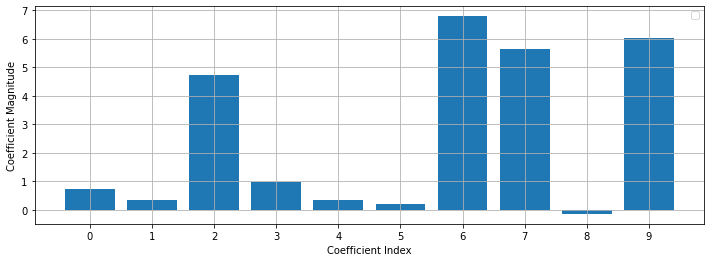

In [13]:
model_coefs = model_lr.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)
indexes = np.array(range(0, len(model_coefs[0])))

plt.figure(figsize=(12,4))
plt.bar(indexes, model_coefs[0])
plt.xticks(indexes)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

According to this plot, what are the most important features?

**Your answer here:** the 6th feature

Save 4 most important feature indexes to a list:

In [14]:
important_feature_idx = [2, 6, 7, 9]

Use these feature indexes to construct new train and test sets with smaller amount of features:

In [15]:
X_train_smaller = X_train[important_feature_idx]
X_test_smaller = X_test[important_feature_idx]

Define a new LinearRegression model, train and test it on new sets:

In [16]:
smaller_model = LinearRegression()
smaller_model.fit(X_train_smaller, Y_train)
train_pred = smaller_model.predict(X_train_smaller)
test_pred = smaller_model.predict(X_test_smaller)
train_score = mean_squared_error(Y_train, train_pred)
test_score = mean_squared_error(Y_test, test_pred)
print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))

Smaller LR train score: 22.244, test score: 26.171


Compare scores of model_lr (variable original_score) and smaller_model (variable smaller_test_score). We reduced number of feature but why scores changes so drastically?

**Your answer here:**
Misplaced priorities

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (X)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.141835,1.702237,1.416003,-0.214893,-0.492513,-0.155813,-0.318232,-0.266354,1.505116,0.087923
1,1.626725,0.778758,-0.612272,0.024236,0.128539,0.207025,-1.146106,-1.022473,1.323372,-0.264412
2,-0.075664,-0.337939,0.591326,-0.123550,-1.440566,1.584462,0.648886,0.383071,-1.609707,-0.925921
3,0.974660,-1.421075,0.411977,1.037524,1.405249,0.294255,-0.484170,1.489914,0.449334,-0.047725
4,-0.281188,-0.302942,1.325804,1.521319,-0.228772,-1.099498,-0.588789,0.353585,1.282631,0.330033


Now we repeat all the steps:


*   split the data
*   train a model on all features
*   plot coefficients
*   choose 4 most-important features
*   train a model on a feature-subset
*   compare the scores
*   profit!



In [19]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [20]:
model_lr_sc = LinearRegression()
model_lr_sc.fit(X_sc_train, Y_sc_train)
train_pred = model_lr_sc.predict(X_sc_train)
test_pred = model_lr_sc.predict(X_sc_test)
train_score = mean_squared_error(Y_sc_train, train_pred)
test_score = mean_squared_error(Y_sc_test, test_pred)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.814, test: 6.916


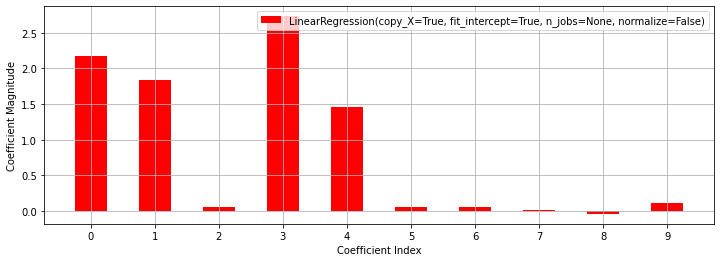

In [21]:
model_coefs = model_lr_sc.coef_

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)
indexes = np.array(range(0, len(model_coefs[0])))

plt.figure(figsize=(12,4))
plt.bar(indexes, model_coefs[0], label=model_lr_sc, width=0.5, color = 'red')
plt.xticks(indexes)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

What are the most important features now? Let's do the sanity check and train on this subset: 

In [22]:
important_feature_idx = [0, 1, 3, 4]

In [23]:
X_sc_train_smaller = X_sc_train[important_feature_idx]
X_sc_test_smaller = X_sc_test[important_feature_idx]

In [24]:
model_lr_sc_smaller = LinearRegression()
model_lr_sc_smaller.fit(X_sc_train_smaller, Y_sc_train)
train_pred = model_lr_sc_smaller.predict(X_sc_train_smaller)
test_pred = model_lr_sc_smaller.predict(X_sc_test_smaller)
train_score = mean_squared_error(Y_sc_train, train_pred)
test_score = mean_squared_error(Y_sc_test, test_pred)
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

**Your answer here:**
Minor improvement on validation

**Task 2 [2 points] Decision Tree**

As you probably now, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: X_train and X_sc_train, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()
rf_scaled = RandomForestRegressor()

In [27]:
rf.fit(X_train, Y_train)
rf_scaled.fit(X_sc_train, Y_sc_train)
rf_test_score = mean_squared_error(Y_test, rf.predict(X_test))
rf_scaled_test_score = mean_squared_error(Y_sc_test, rf_scaled.predict(X_sc_test))
print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RF test score 3.071
RF scaled test score 3.029


In [28]:
rf.feature_importances_

array([0.25391266, 0.21407649, 0.05459466, 0.33541293, 0.08886369,
       0.01117227, 0.01144193, 0.00964321, 0.00914207, 0.0117401 ])

In [29]:
rf_scaled.feature_importances_

array([0.25603131, 0.20878998, 0.05486376, 0.34011402, 0.08978275,
       0.00987275, 0.01118465, 0.00875265, 0.00944224, 0.01116589])

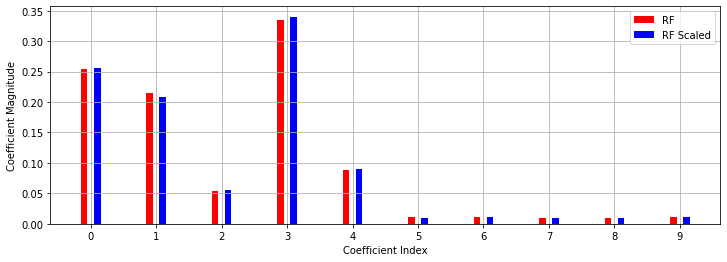

In [30]:
rf_model_coefs = rf.feature_importances_
rf_scaled__model_coefs = rf_scaled.feature_importances_
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_scaled__model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Your Comment on the plot:**
The algorithm does not care whether the data is standardized or not

Now examine how reduction of . You may use time module.

Here is an example:

In [31]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.044 seconds


/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [32]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [33]:
start = time()
rf1.fit(X_train, Y_train)
end = time()
print("fit took {:.3f} seconds".format(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


fit took 0.581 seconds


In [34]:
start = time()
rf2.fit(X_sc_train_smaller, Y_train)
end = time()
print("fit took {:.3f} seconds".format(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


fit took 0.332 seconds


## **Part 2. GridSearch: hyperparameter tuning [11 points]**

In this part we will try to solve a multiclass classification task on Richter's dataset (source). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:


*   kNN
*   LinearRegression
*   DecisionTree
*   RandomForest



In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays X and y, target column is called damage_grade. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply _get_numeric_data() to pandas dataframe).

Split the data into train, test and val with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [36]:
RANDOM_SEED = 42

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
data = pd.read_csv("/gdrive/My Drive/dataset/msu/richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels = data["damage_grade"]

In [39]:
objects.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1030261,27,269,8954,4,45,8,10,t,r,q,f,x,j,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,419144,11,765,2964,2,65,6,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,543923,22,378,9559,2,30,10,4,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,495911,10,310,6799,2,10,5,4,t,w,n,f,q,s,d,1,0,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,347963,18,321,2911,1,20,15,2,t,r,q,x,j,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [40]:
labels.unique()

array([2, 3, 1])

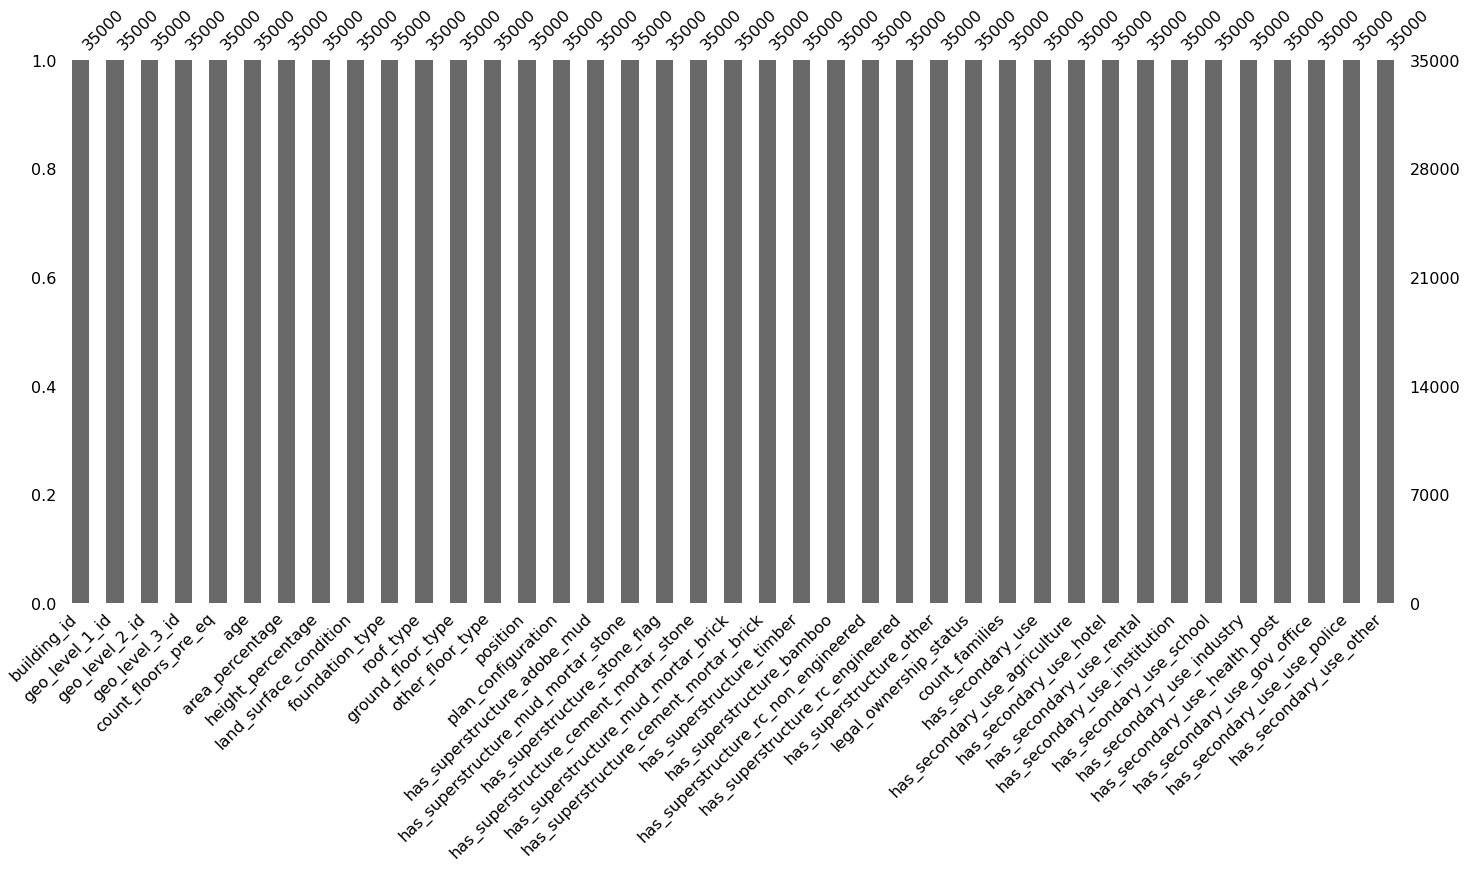

In [41]:
import missingno
missingno.bar(objects)

In [42]:
X = objects._get_numeric_data()
y = labels.copy()

assert X.shape == (35000, 31) and  y.shape == (35000,)

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 3/7, 
                                                    shuffle=True, stratify= y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 1/3, 
                                                    shuffle=True, stratify= y_not_train,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import classification quality metrics:

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with 
**default** 
parameters and check how well they can perform.

In [47]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on X_train, y_train, predict on X_test

In [48]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)  
    pred = clf.predict(X_test)
    clf_predictions.append(pred)

Apply 5 metrics to each prediction:

In [49]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average='micro', zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]
macro_recalls = [recall_score(y_test, pred, average='macro', zero_division=1) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

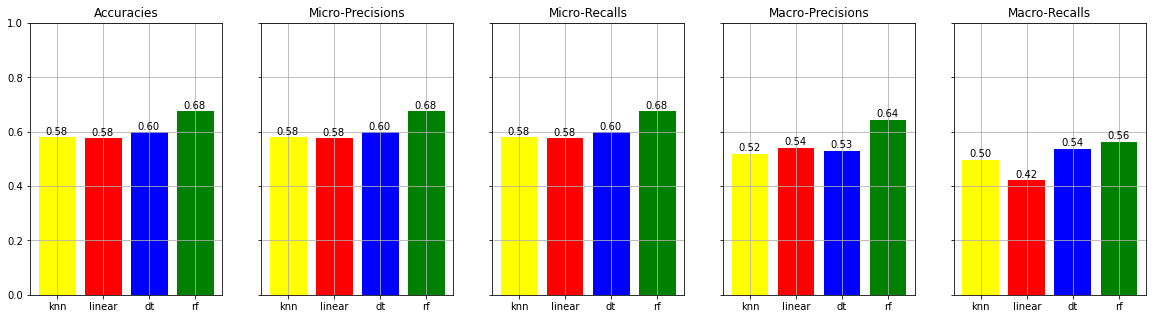

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix. For confusion matrix do from sklearn.metrics import confusion_matrix (don't forget to put valid labels on plots).

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [52]:
weakest_model_index = 2

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)

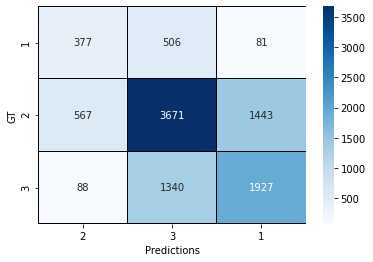

In [53]:
plot_labels = sorted(labels.unique())

sns.heatmap(conf_matrix, 
            cmap="Blues",
            xticklabels=y_test.unique(),
            yticklabels=np.unique(dt_preds),
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

**Your answer:**
3-d class

**Task 2.2 [3 points]. 1-D Grid Search**


No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds k=5.

Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter n_neighbors. Look through all values from 1 to 50.

Hint: np.arange, np.linspace and np.logspace are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive).

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1, 5)
}

In [56]:
knn_grid_searcher = GridSearchCV(knn_clf, knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Plot mean cross-validation score for each hyperparameter:


*   X-axis is hyperparameter values
*   Y-axis is mean CV-score

To show variance of obtained estimatets add mean + 3 stds and mean - 3 stds to the plot. You may use plt.fill_between to make it more descriptive (it will look like a coridor around the mean).

To get values we need to plot search in knn_grid_searcher parameters and attributes.


In [57]:
res = knn_grid_searcher.cv_results_

In [58]:
means = res['mean_test_score']
stds = res['std_test_score']

No handles with labels found to put in legend.


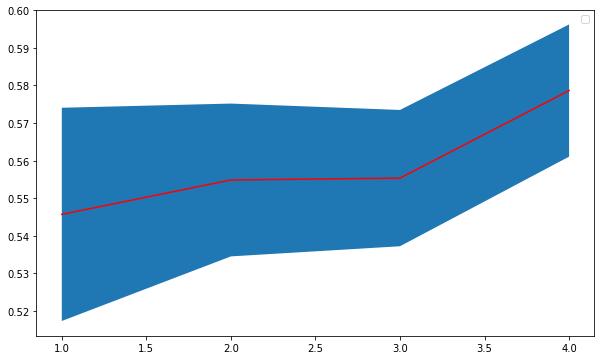

In [59]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot(xs, means, color='red')
plt.fill_between(xs, means + 3 * stds, means - 3 * stds)
plt.legend()
plt.show()

Print the best estimator and its score:

In [60]:
print("Best estimator:", knn_grid_searcher.best_estimator_, "its score:", knn_grid_searcher.best_score_)

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform') its score: 0.57865


Now do the same for 3 other models:



*   Decision Tree: grid search the max_depth parameter
*   LogisticRegression: penalty
*   RandomForest: n_estimators

Some of the hyperparameters are not numeric, but categorical (like penalty) and you should choose some other way to plot cv-scores instead of plt.plot

**Decision Tree**

In [61]:
tree_clf = DecisionTreeClassifier()
tree_grid = {
    "max_depth": np.arange(1,50)
}

In [62]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=5, return_train_score=True)
tree_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [63]:
res_tree = tree_grid_searcher.cv_results_

In [64]:
tree_means = res_tree['mean_test_score']
tree_stds = res_tree['std_test_score']

No handles with labels found to put in legend.


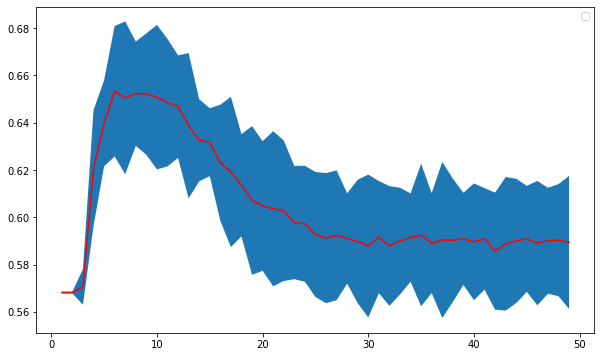

In [65]:
plt.figure(figsize=(10, 6))
xs = tree_grid_searcher.param_grid["max_depth"]
plt.plot(xs, tree_means, color='red')
plt.fill_between(xs, tree_means + 3 * tree_stds, tree_means - 3 * tree_stds)
plt.legend()
plt.show()

In [66]:
print("Best estimator:", tree_grid_searcher.best_estimator_, "its score:", tree_grid_searcher.best_score_)

Best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') its score: 0.6533


**LogisticRegression**

In [67]:
log_clf = LogisticRegression()
log_grid = {
    "penalty": ['l1', 'l2', 'elasticnet']
}

In [68]:
log_grid_searcher = GridSearchCV(log_clf, log_grid, cv=5, return_train_score=True)
log_grid_searcher.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [69]:
res_log = log_grid_searcher.cv_results_

In [70]:
log_means = res_log['mean_test_score']
log_stds = res_log['std_test_score']

In [71]:
log_means

array([    nan, 0.57865,     nan])

In [72]:
log_stds

array([       nan, 0.00621812,        nan])

In [73]:
print("Best estimator:", log_grid_searcher.best_estimator_, "its score:", log_grid_searcher.best_score_)

Best estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) its score: 0.57865


**RandomForest**

In [74]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,50)
}

In [75]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [76]:
res_forest = forest_grid_searcher.cv_results_

In [77]:
forest_means = res_forest['mean_test_score']
forest_stds = res_forest['std_test_score']

No handles with labels found to put in legend.


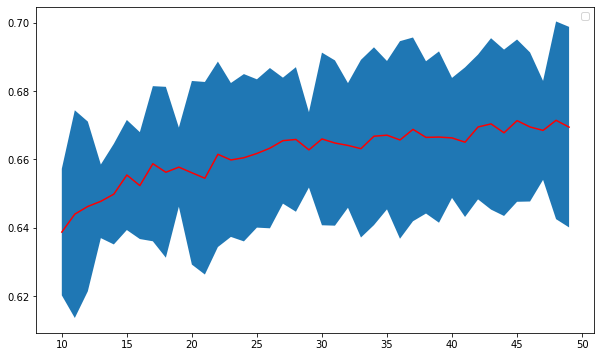

In [78]:
plt.figure(figsize=(10, 6))
xs = forest_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, forest_means, color='red')
plt.fill_between(xs, forest_means + 3 * forest_stds, forest_means - 3 * forest_stds)
plt.legend()
plt.show()

In [79]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=48,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) its score: 0.67145


**Task 2.3 [3 points] 2-D Grid Search**

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal pair of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:



1.   Make sparse grids with fewer number of parameters
2.   Choose random subsample from grid points and look for the optimum there
3.   Reduce number of folds in cross-validation
4.   Make a greedy grid search (use two grid-searchers sequentially)


You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out. Report whether you got boost in quality.

Here are default 2-D grids:


*   kNN:

> *   n_neighbors from 1 to 50
> *   metric: euclidean, manhattan or chebyshev


*   linear

> *   penalty l1, l2, elasticnet, none
> *   C from 0.001 to 1000

*   dtree

> *   max_depth from 1 to 50
> *   criterion gini or entropy

*   rf

> *   n_estimators from 1 to 200
> *   max_features from 1 to 30




**KNeighborsClassifier**

In [80]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1,5),
    "metric": ('euclidean', 'manhattan', 'chebyshev')
}

In [81]:
knn_grid_searcher = GridSearchCV(knn_clf, knn_grid, cv=5, return_train_score=True)
knn_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ('euclidean', 'manhattan', 'chebyshev'),
                         'n_neighbors': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [82]:
print("Best estimator:", knn_grid_searcher.best_estimator_, "its score:", knn_grid_searcher.best_score_)

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform') its score: 0.5997


**Decision Tree**

In [83]:
tree_clf = DecisionTreeClassifier()
tree_grid = {
    "max_depth": np.arange(1,50),
    "criterion": ('gini', 'entropy')
}

In [84]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=5, return_train_score=True)
tree_grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                   

In [85]:
print("Best estimator:", tree_grid_searcher.best_estimator_, "its score:", tree_grid_searcher.best_score_)

Best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') its score: 0.6533


**RandomForest**

In [86]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,50),
    "max_features": np.arange(1,30)
}

In [ ]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train, y_train)

In [ ]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)